In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D

In [ ]:
Data = pd.read_excel('Composite Dep Data(1).xlsx')
Data.head()

,Date/Time,T_air,RH_air,Radiative intensity,Heating energy by auxiliary heater,Radiant VA chiller supplied cooling energy,DOAS VC chiller supplied cooling energy,Heating energy by solar collector,Heating energy by gas boiler,Output 1 (Cooling capacity),Output 2 (Heating load)
0,2023-01-02 09:00:00,10.8875,58.750,385.5000,6323.376,0.00,0.000,-110708.000,116645.20,0.000,12260.576
1,2023-01-02 10:00:00,13.5250,48.750,809.7500,35776.870,0.00,6051.082,9041.437,27640.82,6051.082,72459.127
2,2023-01-02 11:00:00,16.4375,40.625,953.9375,120066.400,14853.30,23474.050,121198.000,0.00,38327.350,241264.400
3,2023-01-02 12:00:00,18.6625,34.250,1045.2500,183090.900,20258.60,35664.260,183061.000,0.00,55922.860,366151.900
4,2023-01-02 13:00:00,20.1750,30.125,771.1250,145662.000,19393.08,25883.420,144844.100,0.00,45276.500,290506.100


In [ ]:
# Assuming 'datetime_column' is your datetime column
Data['Timestamp'] = pd.to_datetime(Data['Date/Time']).dt.hour
Data['Year'] = pd.to_datetime(Data['Date/Time']).dt.year
Data['Month'] = pd.to_datetime(Data['Date/Time']).dt.month
Data['Day'] = pd.to_datetime(Data['Date/Time']).dt.day

Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 15 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   Date/Time                                   2600 non-null   datetime64[ns]
 1   T_air                                       2600 non-null   float64       
 2   RH_air                                      2600 non-null   float64       
 3   Radiative intensity                         2600 non-null   float64       
 4   Heating energy by auxiliary heater          2600 non-null   float64       
 5   Radiant VA chiller supplied cooling energy  2600 non-null   float64       
 6   DOAS VC chiller supplied cooling energy     2600 non-null   float64       
 7   Heating energy by solar collector           2600 non-null   float64       
 8   Heating energy by gas boiler                2600 non-null   float64       
 9   Output 1

In [ ]:
Data = Data.drop(['Date/Time'], axis = 1)
# Data = Data[Data['Heating energy by auxiliary heater']>0]
Data

,T_air,RH_air,Radiative intensity,Heating energy by auxiliary heater,Radiant VA chiller supplied cooling energy,DOAS VC chiller supplied cooling energy,Heating energy by solar collector,Heating energy by gas boiler,Output 1 (Cooling capacity),Output 2 (Heating load),Timestamp,Year,Month,Day
0,10.8875,58.750,385.5000,6323.376,0.00,0.000,-110708.000,116645.20,0.000,12260.576,9,2023,1,2
1,13.5250,48.750,809.7500,35776.870,0.00,6051.082,9041.437,27640.82,6051.082,72459.127,10,2023,1,2
2,16.4375,40.625,953.9375,120066.400,14853.30,23474.050,121198.000,0.00,38327.350,241264.400,11,2023,1,2
3,18.6625,34.250,1045.2500,183090.900,20258.60,35664.260,183061.000,0.00,55922.860,366151.900,12,2023,1,2
4,20.1750,30.125,771.1250,145662.000,19393.08,25883.420,144844.100,0.00,45276.500,290506.100,13,2023,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2595,20.0000,42.250,505.0625,78525.160,17683.22,43114.650,76423.580,0.00,60797.870,154948.740,14,2023,12,29
2596,20.0625,44.250,171.6250,36301.080,4964.62,43079.440,-6820.020,41787.88,48044.060,71268.940,15,2023,12,29
2597,19.4750,47.500,50.5625,26483.390,0.00,40005.250,-65525.600,92069.77,40005.250,53027.560,16,2023,12,29
2598,18.2875,51.500,47.3750,11396.350,0.00,33653.110,-88146.500,99401.88,33653.110,22651.730,17,2023,12,29


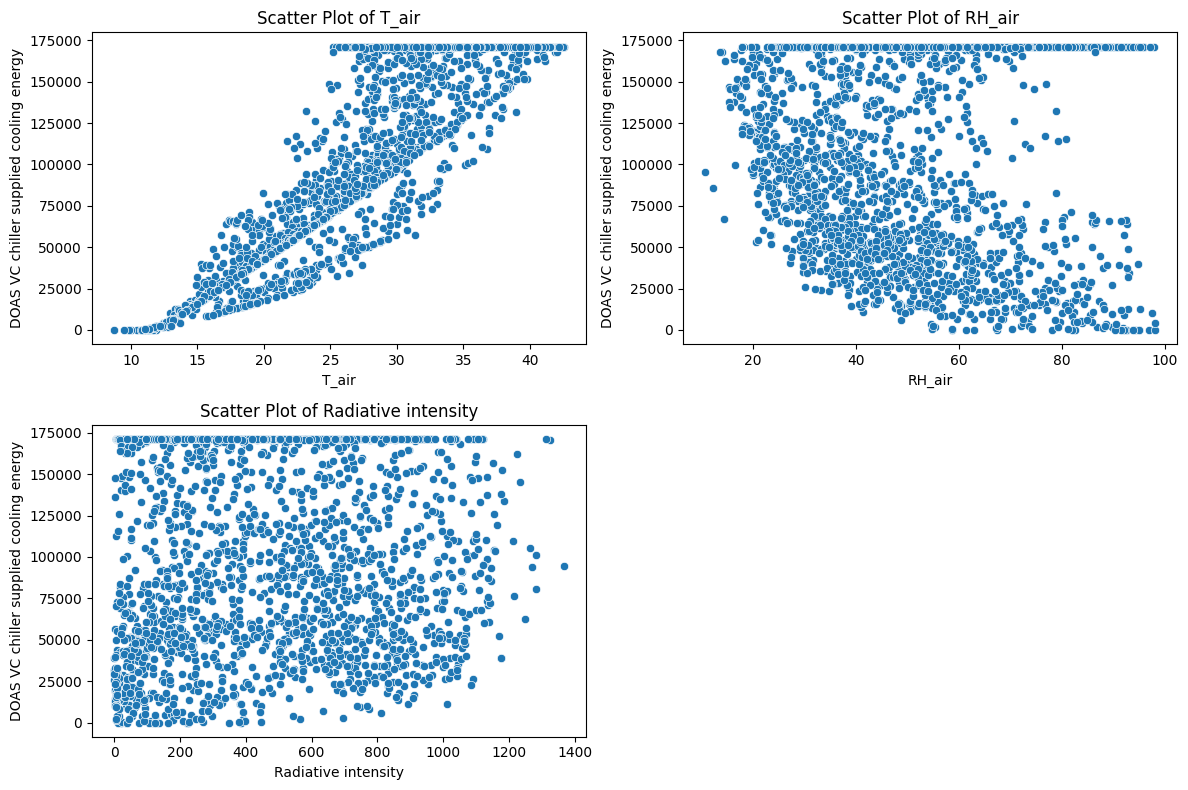

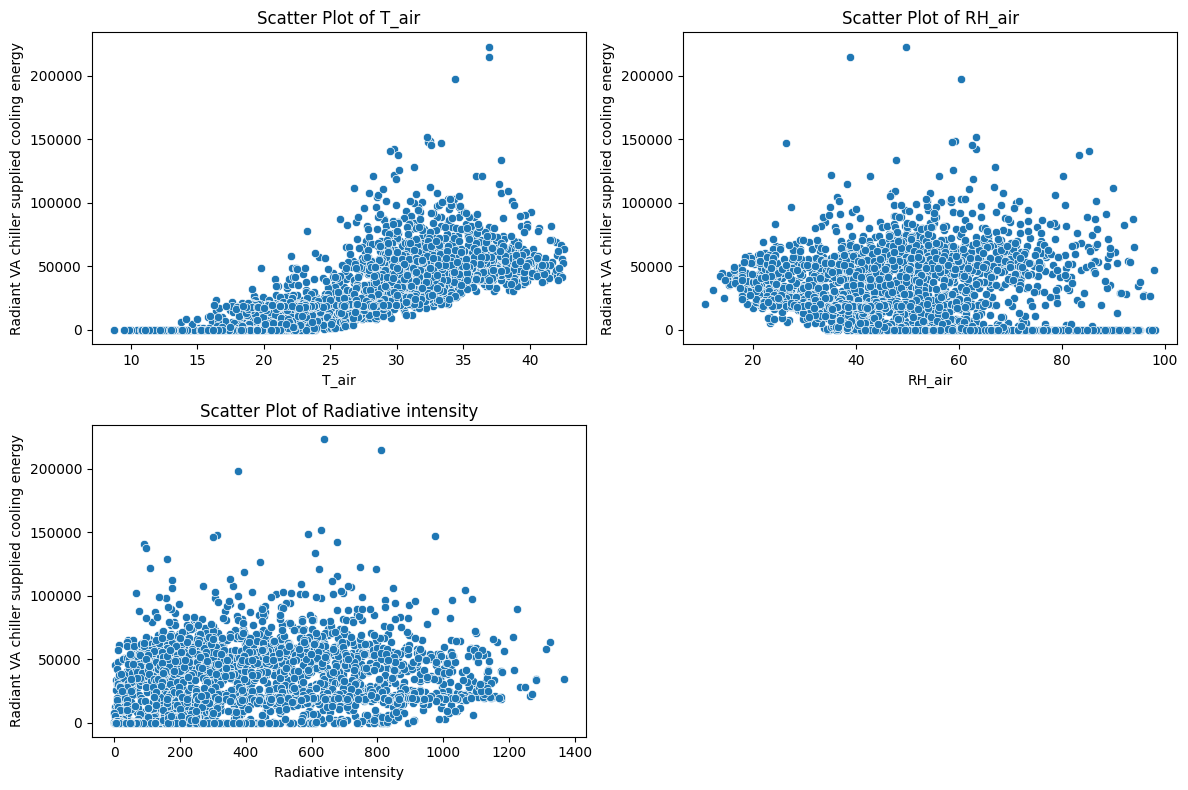

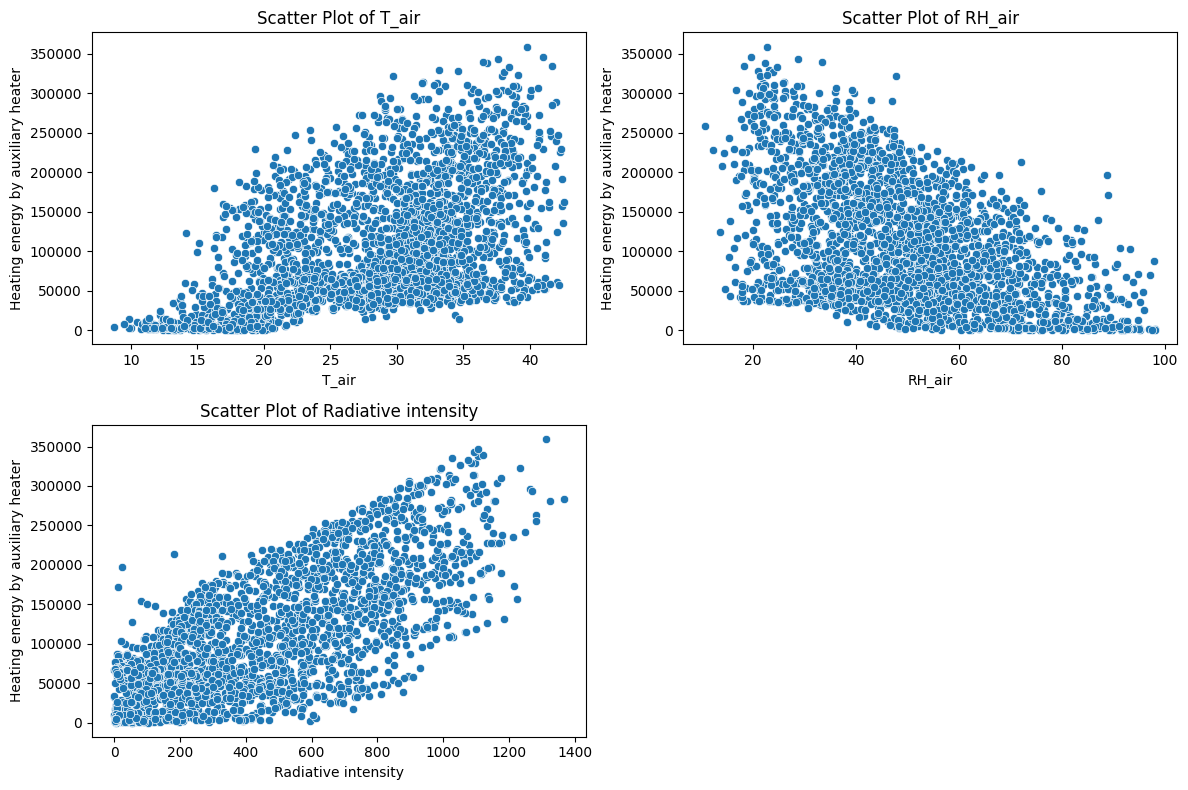

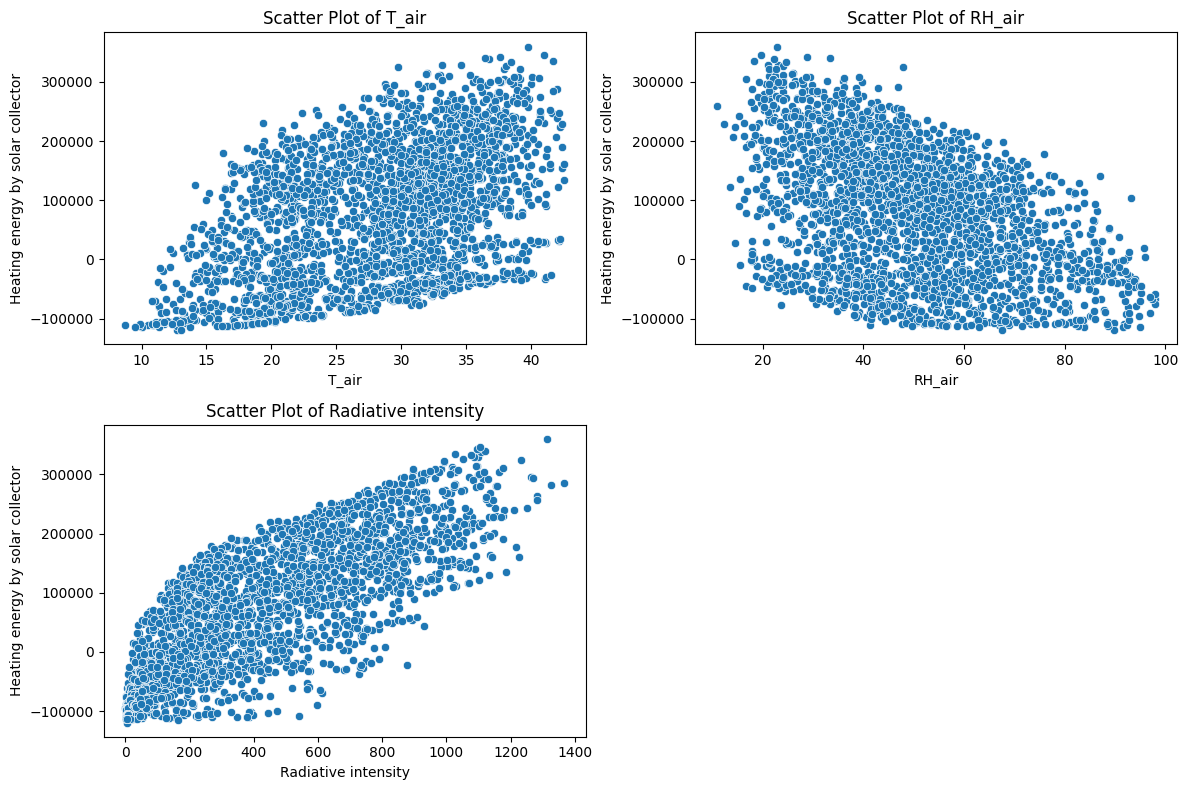

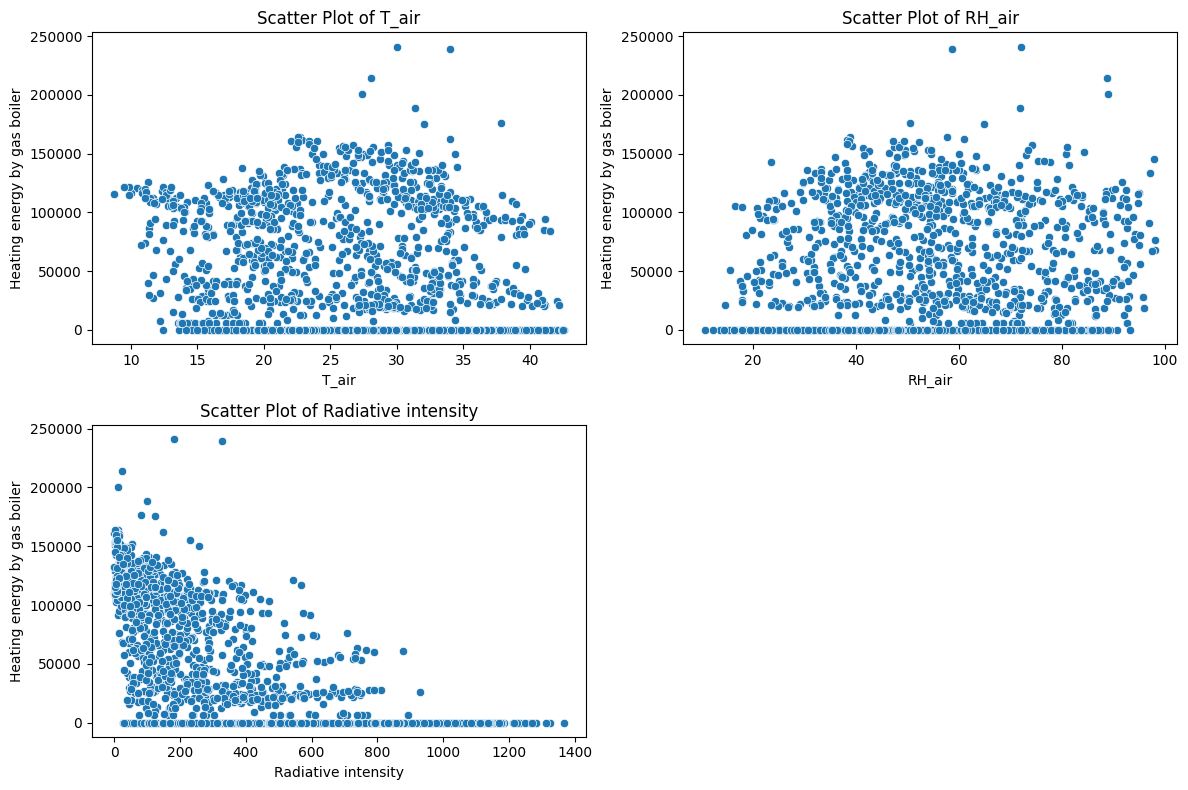

In [ ]:
# Plot scatter plots for each feature
plt.figure(figsize=(12, 8))

for i, feature in enumerate(Data.columns[0:3]):
    plt.subplot(2, 2, i + 1)

    # Scatter Plot
    sns.scatterplot(x=feature, y='DOAS VC chiller supplied cooling energy', data=Data)
    plt.title(f'Scatter Plot of {feature}')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
for i, feature in enumerate(Data.columns[0:3]):
    plt.subplot(2, 2, i + 1)

    # Scatter Plot
    sns.scatterplot(x=feature, y='Radiant VA chiller supplied cooling energy', data=Data)
    plt.title(f'Scatter Plot of {feature}')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
for i, feature in enumerate(Data.columns[0:3]):
    plt.subplot(2, 2, i + 1)

    # Scatter Plot
    sns.scatterplot(x=feature, y='Heating energy by auxiliary heater', data=Data)
    plt.title(f'Scatter Plot of {feature}')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
for i, feature in enumerate(Data.columns[0:3]):
    plt.subplot(2, 2, i + 1)

    # Scatter Plot
    sns.scatterplot(x=feature, y='Heating energy by solar collector', data=Data)
    plt.title(f'Scatter Plot of {feature}')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
for i, feature in enumerate(Data.columns[0:3]):
    plt.subplot(2, 2, i + 1)

    # Scatter Plot
    sns.scatterplot(x=feature, y='Heating energy by gas boiler', data=Data)
    plt.title(f'Scatter Plot of {feature}')

plt.tight_layout()
plt.show()

In [ ]:
# Data['Heating Energy'] = Data['Heating energy by auxiliary heater'] + Data['Heating energy by solar collector'] + Data['Heating energy by gas boiler'] + 9999
# Data['Cooling Energy'] = Data['DOAS VC chiller supplied cooling energy'] + Data['Radiant VA chiller supplied cooling energy']


In [ ]:
# Data = Data.drop(['DOAS VC chiller supplied cooling energy'] , axis = 1)
# Data = Data.drop(['Radiant VA chiller supplied cooling energy'] , axis = 1)
# Data = Data.drop(['Heating energy by gas boiler'], axis = 1)
# Data = Data.drop(['Heating energy by solar collector'] , axis = 1)
# Data = Data.drop(['Heating energy by auxiliary heater'], axis = 1)

Data = Data.drop(['Output 1 (Cooling capacity)'], axis = 1)
Data = Data.drop(['Output 2 (Heating load)'], axis = 1)

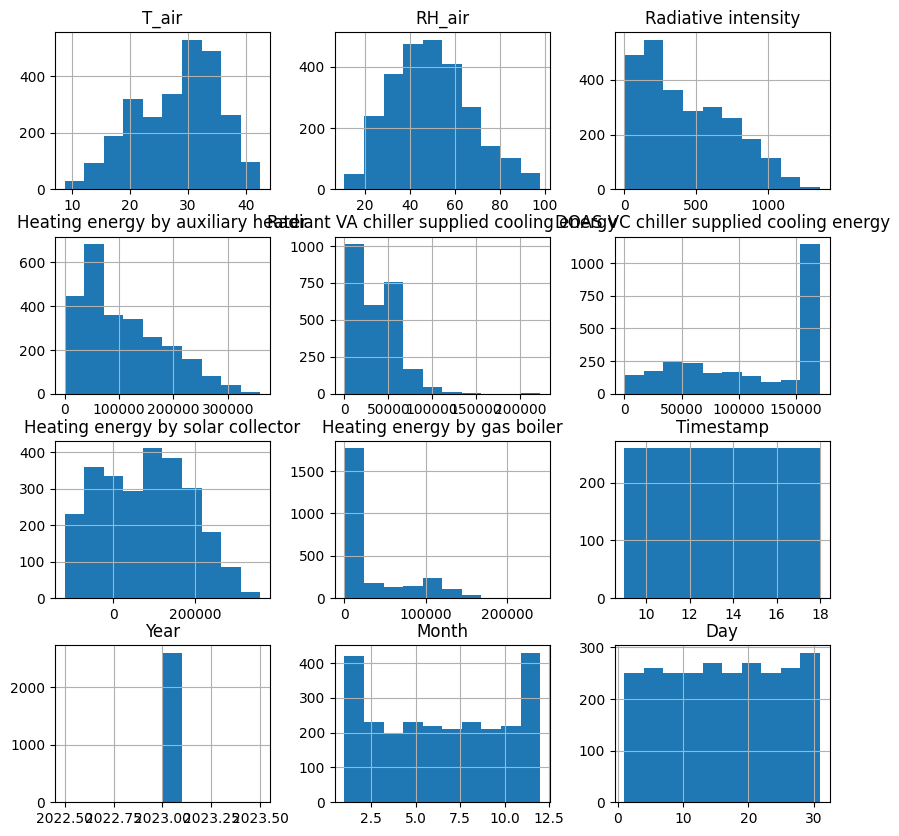

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'data' is your DataFrame
# Replace 'data' with the name of your DataFrame if it's different
Data.hist(figsize=(10, 10))  # Adjust figsize as needed
plt.show()


In [ ]:
# import numpy as np
# import pandas as pd

# # Assuming 'data' is your DataFrame with skewed columns
# # Replace 'data' with the name of your DataFrame if it's different

# # List of columns to be transformed
# columns_to_transform = ['Heating Energy', 'Cooling Energy']

# # Apply logarithmic transformation to selected columns
# Data[columns_to_transform] = np.log1p(Data[columns_to_transform])

# # Plot histograms of transformed data
# Data.hist(figsize=(10, 10))
# plt.show()


In [ ]:
Data

,T_air,RH_air,Radiative intensity,Heating energy by auxiliary heater,Radiant VA chiller supplied cooling energy,DOAS VC chiller supplied cooling energy,Heating energy by solar collector,Heating energy by gas boiler,Timestamp,Year,Month,Day
0,10.8875,58.750,385.5000,6323.376,0.00,0.000,-110708.000,116645.20,9,2023,1,2
1,13.5250,48.750,809.7500,35776.870,0.00,6051.082,9041.437,27640.82,10,2023,1,2
2,16.4375,40.625,953.9375,120066.400,14853.30,23474.050,121198.000,0.00,11,2023,1,2
3,18.6625,34.250,1045.2500,183090.900,20258.60,35664.260,183061.000,0.00,12,2023,1,2
4,20.1750,30.125,771.1250,145662.000,19393.08,25883.420,144844.100,0.00,13,2023,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
2595,20.0000,42.250,505.0625,78525.160,17683.22,43114.650,76423.580,0.00,14,2023,12,29
2596,20.0625,44.250,171.6250,36301.080,4964.62,43079.440,-6820.020,41787.88,15,2023,12,29
2597,19.4750,47.500,50.5625,26483.390,0.00,40005.250,-65525.600,92069.77,16,2023,12,29
2598,18.2875,51.500,47.3750,11396.350,0.00,33653.110,-88146.500,99401.88,17,2023,12,29


In [ ]:
# import pandas as pd

# # Assuming 'Data' is your DataFrame
# # Replace 'Data' with the name of your DataFrame if it's different

# # Identify the column you want to filter
# column_to_filter = 'Cooling Energy'

# # Determine the range of values within 200-300
# lower_limit = 200000
# upper_limit = 300000

# # Filter the DataFrame to retain only values within the specified range
# filtered_data = Data[(Data[column_to_filter] >= lower_limit) & (Data[column_to_filter] <= upper_limit)]

# # Calculate the number of occurrences to retain (20% of total)
# num_to_retain = int(0.1 * len(filtered_data))

# # Sort the DataFrame by the column to be filtered
# sorted_data = filtered_data.sort_values(by=column_to_filter)

# # Remove 80% of occurrences of values outside the specified range
# final_data = pd.concat([sorted_data.head(num_to_retain), sorted_data.tail(num_to_retain)])

# # Alternatively, you can directly drop the values outside the range
# # final_data = Data[(Data[column_to_filter] >= lower_limit) & (Data[column_to_filter] <= upper_limit)]

# # Display the final DataFrame
# print(final_data)


In [ ]:
# import matplotlib.pyplot as plt
# import pandas as pd

# # Assuming 'data' is your DataFrame
# # Replace 'data' with the name of your DataFrame if it's different
# filtered_data.hist(figsize=(10, 10))  # Adjust figsize as needed
# plt.show()


In [ ]:
# Data

# plt.figure(figsize=(12, 8))

# for i, feature in enumerate(Data.columns[0:3]):
#     plt.subplot(2, 2, i + 1)

#     # Scatter Plot
#     sns.scatterplot(x=feature, y='Heating Energy', data=Data)
#     plt.title(f'Scatter Plot of {feature}')
#     plt.ylabel('Heating Load(W) ')

# plt.figure(figsize=(12, 8))

# for i, feature in enumerate(Data.columns[0:3]):
#     plt.subplot(2, 2, i + 1)

#     # Scatter Plot
#     sns.scatterplot(x=feature, y='Cooling Energy', data=Data)
#     plt.title(f'Scatter Plot of {feature}')
#     # plt.xlabel(f'T_air(°C) {feature} ')  # Replace 'Renamed' with your desired label
#     plt.ylabel('Cooling Capacity(W) ')

Outliers in Radiative intensity:
Empty DataFrame
Columns: [T_air, RH_air, Radiative intensity, Heating energy by auxiliary heater, Radiant VA chiller supplied cooling energy, DOAS VC chiller supplied cooling energy, Heating energy by solar collector, Heating energy by gas boiler, Timestamp, Year, Month, Day]
Index: []
Outliers in T_air:
Empty DataFrame
Columns: [T_air, RH_air, Radiative intensity, Heating energy by auxiliary heater, Radiant VA chiller supplied cooling energy, DOAS VC chiller supplied cooling energy, Heating energy by solar collector, Heating energy by gas boiler, Timestamp, Year, Month, Day]
Index: []
Outliers in RH_air:
        T_air  RH_air  Radiative intensity  \
104   11.8750  98.000              23.1250   
105   12.4125  98.000              15.7500   
1389  28.7250  97.875              12.0625   

      Heating energy by auxiliary heater  \
104                             738.2634   
105                             501.1574   
1389                          87199.3

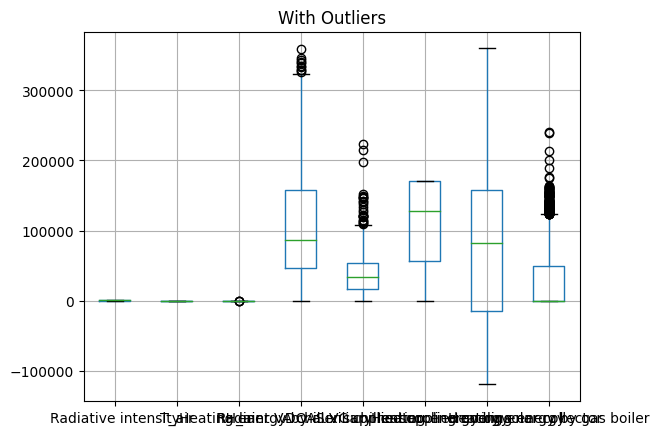

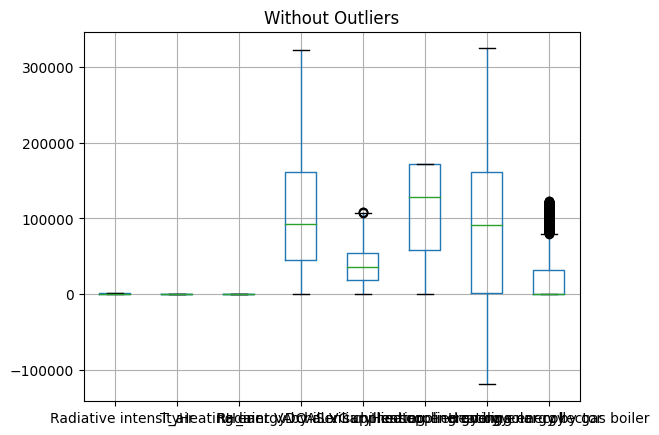

In [ ]:
# Function to detect outliers using IQR
# Data = Data.drop('Heating energy by gas boiler', axis = 1)

def detect_outliers(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = (data < lower_bound) | (data > upper_bound)
    return outliers

# Specify the columns for which you want to detect outliers
columns_to_check = ['Radiative intensity', 'T_air', 'RH_air', 'Heating energy by auxiliary heater', 	'Radiant VA chiller supplied cooling energy', 	'DOAS VC chiller supplied cooling energy', 	'Heating energy by solar collector', 	'Heating energy by gas boiler']

# Detect outliers for each column
outliers_dict = {}
for column in columns_to_check:
    outliers_dict[column] = detect_outliers(Data[column])

# Display outliers
for column, outliers in outliers_dict.items():
    print(f"Outliers in {column}:")
    print(Data[outliers])

# Drop rows containing outliers
outliers_rows = outliers_dict[columns_to_check[0]]
for column in columns_to_check[1:]:
    outliers_rows |= outliers_dict[column]

cleaned_data = Data[~outliers_rows]

# Visualize the outliers using box plots
Data.boxplot(column=columns_to_check)
plt.title("With Outliers")
plt.show()

cleaned_data.boxplot(column=columns_to_check)
plt.title("Without Outliers")
plt.show()

In [ ]:
cleaned_data.shape
cleaned_data
cleaned_data.describe()

,T_air,RH_air,Radiative intensity,Heating energy by auxiliary heater,Radiant VA chiller supplied cooling energy,DOAS VC chiller supplied cooling energy,Heating energy by solar collector,Heating energy by gas boiler,Timestamp,Year,Month,Day
count,2424.000000,2424.000000,2424.000000,2424.000000,2424.000000,2424.000000,2424.000000,2424.000000,2424.000000,2424.0,2424.000000,2424.000000
mean,28.265640,49.510417,450.521465,108080.954674,34932.961248,114036.897367,85183.778870,22615.683604,13.308993,2023.0,6.398927,15.844884
std,7.201444,17.532480,299.582306,76711.106155,24460.292835,58542.941279,103218.806521,38265.059303,2.753122,0.0,3.443503,8.809060
min,8.762500,10.875000,0.375000,67.403000,0.000000,0.000000,-119393.000000,0.000000,9.000000,2023.0,1.000000,1.000000
25%,22.281250,36.500000,197.906250,45092.252500,17750.785000,57676.795000,1114.152500,0.000000,11.000000,2023.0,3.000000,8.000000
50%,29.743750,48.625000,391.218750,92057.230000,34917.130000,127497.750000,91123.090000,0.000000,13.000000,2023.0,6.000000,16.000000
75%,33.700000,61.125000,680.828125,160993.600000,53629.467500,171214.800000,161070.750000,31648.070000,16.000000,2023.0,9.000000,24.000000
max,42.537500,97.375000,1366.813000,322799.200000,107734.700000,171214.800000,324368.600000,123263.500000,18.000000,2023.0,12.000000,31.000000


In [ ]:
from sklearn.preprocessing import MinMaxScaler , StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
#'Year','Month','Day'
X = cleaned_data[['Timestamp','Year','Month','Day','Radiative intensity','T_air','RH_air']].values
y_DOAS = np.array(cleaned_data[['DOAS VC chiller supplied cooling energy']].values)
y_Rad =np.array(cleaned_data[['Radiant VA chiller supplied cooling energy']].values)
y_solar = np.array(cleaned_data[['Heating energy by solar collector']].values)
y_aux = np.array(cleaned_data[['Heating energy by auxiliary heater']].values)
y_boil = np.array(cleaned_data[['Heating energy by gas boiler']].values)

# y_C = y_DOAS + y_Rad
# y_H = y_solar + y_aux + y_boil
# y_C = cleaned_data['Cooling Energy']
# y_H = cleaned_data['Heating Energy']

# y_C = np.array(y_C).reshape(-1, 1)
# y_H = np.array(y_H).reshape(-1, 1)

y_DOAS = np.array(y_DOAS).reshape(-1, 1)
y_Rad = np.array(y_Rad).reshape(-1, 1)
y_solar = np.array(y_solar).reshape(-1, 1)
y_aux = np.array(y_aux).reshape(-1, 1)
y_boil = np.array(y_boil).reshape(-1, 1)



# Initialize the MinMaxScaler
scaler_x = MinMaxScaler()
scaler_y_DOAS = MinMaxScaler()
scaler_y_Rad = MinMaxScaler()
scaler_y_solar = MinMaxScaler()
scaler_y_aux = MinMaxScaler()
scaler_y_boil = MinMaxScaler()
# scaler_y_C = MinMaxScaler()    # For Cooling Energy
# scaler_y_H = MinMaxScaler()    # For Heating Energy

# scaler = StandardScaler()
X_Normalized = scaler_x.fit_transform(X)
y_DOAS_Normalized = scaler_y_DOAS.fit_transform(y_DOAS)
y_Rad_Normalized = scaler_y_Rad.fit_transform(y_Rad)
y_solar_Normalized = scaler_y_solar.fit_transform(y_solar)
y_aux_Normalized = scaler_y_aux.fit_transform(y_aux)
y_boil_Normalized = scaler_y_boil.fit_transform(y_boil)
# Y_Normalized_C = scaler_y_C.fit_transform(y_C)
# Y_Normalized_H = scaler_y_H.fit_transform(y_H)

# X_train, X_test, y_train_C, y_test_C = train_test_split(X_Normalized, Y_Normalized_C, test_size=0.2, random_state=42)
# X_train, X_test, y_train_H, y_test_H = train_test_split(X_Normalized, Y_Normalized_H, test_size=0.2, random_state=42)

# from sklearn.model_selection import train_test_split

# Generate indices for splitting
indices = range(len(X_Normalized))
indices_train, indices_test = train_test_split(indices, test_size=0.2, random_state=42)

# Split the data into training and testing sets
X_train_all, X_test_all = X_Normalized[indices_train], X_Normalized[indices_test]
y_train_DOAS, y_test_DOAS = y_DOAS_Normalized[indices_train], y_DOAS_Normalized[indices_test]
y_train_Rad, y_test_Rad = y_Rad_Normalized[indices_train], y_Rad_Normalized[indices_test]
y_train_solar, y_test_solar = y_solar_Normalized[indices_train], y_solar_Normalized[indices_test]
y_train_aux, y_test_aux = y_aux_Normalized[indices_train], y_aux_Normalized[indices_test]
y_train_boil, y_test_boil = y_boil_Normalized[indices_train], y_boil_Normalized[indices_test]

# Ensure X_train and X_test are the same for both targets
X_train = X_train_all.copy()
X_test = X_test_all.copy()



In [ ]:
import numpy as np
from keras import backend as K
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)

    # Avoid division by zero
    non_zero_mask = y_true != 0
    y_true, y_pred = y_true[non_zero_mask], y_pred[non_zero_mask]

    # Calculate MAPE
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    return mape

def r2_metric(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return (1 - SS_res / (SS_tot + K.epsilon()))

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

def create_custom_model(input_shape=(7,)):
    model = models.Sequential()

    # Input layer
    model.add(layers.Dense(16, activation='relu', input_shape=input_shape))

    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dropout(0.3))

    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dropout(0.4))

    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dropout(0.3))

    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(8, activation='relu'))

    # Output layer
    model.add(layers.Dense(1, activation='linear'))

    return model

In [ ]:
def evaluate_model_performance(model, X_train, y_train, X_test, y_test, scaler):
    # Predictions for test and train data
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)

    # Calculate Mean Absolute Percentage Error (MAE) and Mean Squared Error (MSE)
    mae_test = mean_absolute_percentage_error(y_test, y_pred_test)
    mse_test = mean_squared_error(y_test, y_pred_test)
    r_squared_test = r2_score(y_test, y_pred_test)

    mae_train = mean_absolute_percentage_error(y_train, y_pred_train)
    mse_train = mean_squared_error(y_train, y_pred_train)
    r_squared_train = r2_score(y_train, y_pred_train)

    print('For test Data with Output DOAS Cooling Energy')
    print(f'Mean Absolute Percentage Error (MAE): {mae_test}')
    print(f'Mean Squared Error (MSE): {mse_test}')
    print(f'R-squared: {r_squared_test}')

    print('For train Data with output DOAS Cooling Energy')
    print(f'Mean Absolute Percentage Error (MAE): {mae_train}')
    print(f'Mean Squared Error (MSE): {mse_train}')
    print(f'R-squared: {r_squared_train}')

    # Inverse transform predictions to original scale
    y_pred_original_scale = scaler.inverse_transform(y_pred_test)
    y_test_original_scale = scaler.inverse_transform(y_test)

    # Calculate R-squared for original scale
    r_squared_original_scale = r2_score(y_test_original_scale, y_pred_original_scale)
    print('\nFor scaled data')
    print(f'R-squared for original value(Scaled): {r_squared_original_scale}')

    # Calculate MAPE and MSE for original scale
    mae_original_scale = mean_absolute_percentage_error(y_test_original_scale, y_pred_original_scale)
    mse_original_scale = mean_squared_error(y_test_original_scale, y_pred_original_scale)

    # Display R-squared values for each output
    print(f'R-squared for Output Dimension DOAS: {r_squared_test}')
    print(f'Mean Absolute Percentage Error (MAPE) DOAS: {mae_test}')

    return y_pred_test

In [ ]:
def plot_training_history(history, metric, title):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history[metric], label=f'Training {metric}')
    plt.plot(history.history[f'val_{metric}'], label=f'Validation {metric}')
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel(metric)
    plt.legend()
    plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Define a function to create scatter plots for each target variable
def create_scatter_plot(true_values, predicted_values, ylabel):
    # Calculate the absolute percentage error
    absolute_percentage_error = np.abs((predicted_values - true_values) / true_values) * 100

    # Set tolerance thresholds (e.g., 2% and 5%)
    tolerance_threshold_2 = 10
    tolerance_threshold_5 = 15

    # Color-code the points based on the percentage difference
    colors = np.where(absolute_percentage_error <= tolerance_threshold_5, 'green', 'red')

    # Create a scatter plot
    plt.scatter(true_values, predicted_values, color=colors, alpha=0.7)
    plt.plot([min(true_values), max(true_values)], [min(true_values), max(true_values)], linestyle='--', color='blue', linewidth=2)
    plt.plot([min(true_values), max(true_values)], [(1 - tolerance_threshold_2/100) * min(true_values), (1 - tolerance_threshold_2/100) * max(true_values)], linestyle='--', color='orange', linewidth=2)
    plt.plot([min(true_values), max(true_values)], [(1 + tolerance_threshold_2/100) * min(true_values), (1 + tolerance_threshold_2/100) * max(true_values)], linestyle='--', color='orange', linewidth=2)
    plt.plot([min(true_values), max(true_values)], [(1 - tolerance_threshold_5/100) * min(true_values), (1 - tolerance_threshold_5/100) * max(true_values)], linestyle='--', color='red', linewidth=2)
    plt.plot([min(true_values), max(true_values)], [(1 + tolerance_threshold_5/100) * min(true_values), (1 + tolerance_threshold_5/100) * max(true_values)], linestyle='--', color='red', linewidth=2)

    # Custom legend handles
    legend_handles = [
        Line2D([0], [0], linestyle='--', color='blue', linewidth=2),
        Line2D([0], [0], linestyle='--', color='orange', linewidth=2),
        Line2D([0], [0], linestyle='--', color='red', linewidth=2)
    ]

    plt.xlabel('True Values')
    plt.ylabel(f'Predicted Values ({ylabel})')
    plt.title(f'Scatter Plot for {ylabel} on Testing Data')
    plt.legend(legend_handles, ['45-Degree Line', f'10% Deviation', f'15% Deviation'], loc='upper left')
    plt.show()

    # Calculate the number of points within 5% deviation
    num_within_5_percent = np.sum(absolute_percentage_error <= tolerance_threshold_5)

    # Calculate the number of points within 2% deviation
    num_within_2_percent = np.sum((absolute_percentage_error <= tolerance_threshold_2))

    # Print the counts
    print(f"Number of data points within 15% deviation: {num_within_5_percent}/{len(true_values)}")
    print(f"Number of data points within 10% deviation: {num_within_2_percent}/{len(true_values)}")

In [ ]:
model_doas = create_custom_model()

# Compile the model
custom_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model_doas.compile(optimizer=custom_optimizer, loss='mse' , metrics=[r2_metric])

# Train the model
history = model_doas.fit(X_train, y_train_DOAS, epochs=200, batch_size=42, validation_data=(X_test, y_test_DOAS), verbose=1)

Epoch 1/200
47/47 [==============================] - 4s 18ms/step - loss: 0.1107 - r2_metric: 0.0199 - val_loss: 0.0275 - val_r2_metric: 0.7558
Epoch 2/200
47/47 [==============================] - 1s 12ms/step - loss: 0.0232 - r2_metric: 0.7997 - val_loss: 0.0086 - val_r2_metric: 0.9206
Epoch 3/200
47/47 [==============================] - 1s 11ms/step - loss: 0.0127 - r2_metric: 0.8545 - val_loss: 0.0089 - val_r2_metric: 0.9199
Epoch 4/200
47/47 [==============================] - 1s 11ms/step - loss: 0.0097 - r2_metric: 0.9123 - val_loss: 0.0187 - val_r2_metric: 0.8344
Epoch 5/200
47/47 [==============================] - 0s 10ms/step - loss: 0.0087 - r2_metric: 0.9217 - val_loss: 0.0087 - val_r2_metric: 0.9213
Epoch 6/200
47/47 [==============================] - 1s 12ms/step - loss: 0.0077 - r2_metric: 0.9313 - val_loss: 0.0068 - val_r2_metric: 0.9384
Epoch 7/200
47/47 [==============================] - 1s 12ms/step - loss: 0.0064 - r2_metric: 0.9434 - val_loss: 0.0081 - val_r2_metric:

61/61 [==============================] - 0s 3ms/step
For test Data with Output DOAS Cooling Energy
Mean Absolute Percentage Error (MAE): 7.237174239950954
Mean Squared Error (MSE): 0.0007110715542392096
R-squared: 0.9939172303077006
For train Data with output DOAS Cooling Energy
Mean Absolute Percentage Error (MAE): 10.145726963398957
Mean Squared Error (MSE): 0.0003920169037931711
R-squared: 0.9966452643092404

For scaled data
R-squared for original value(Scaled): 0.9939172304809151
R-squared for Output Dimension DOAS: 0.9939172303077006
Mean Absolute Percentage Error (MAPE) DOAS: 7.237174239950954


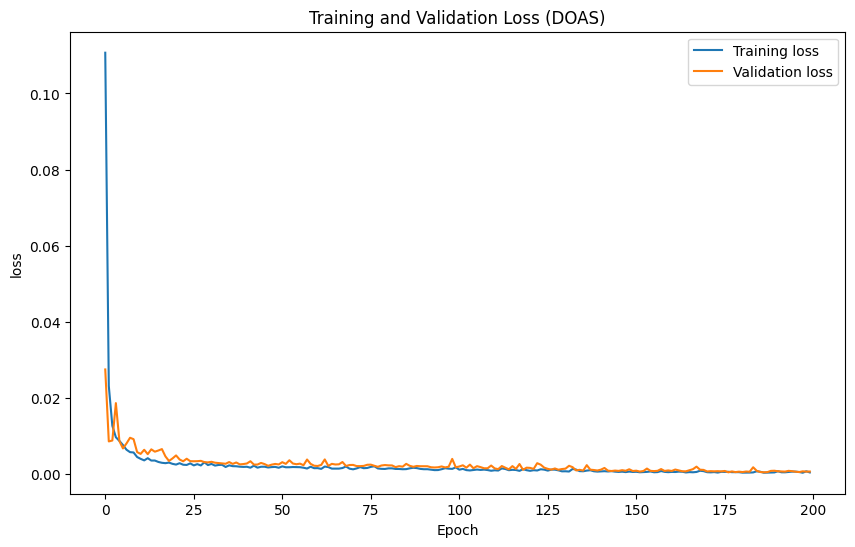

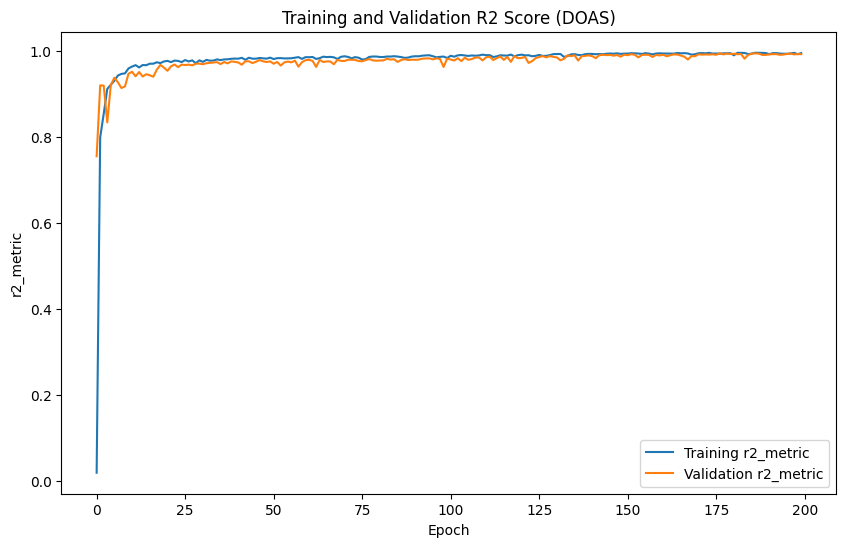

<ipython-input-145-2b3db282833b>:8: RuntimeWarning: divide by zero encountered in divide
  absolute_percentage_error = np.abs((predicted_values - true_values) / true_values) * 100


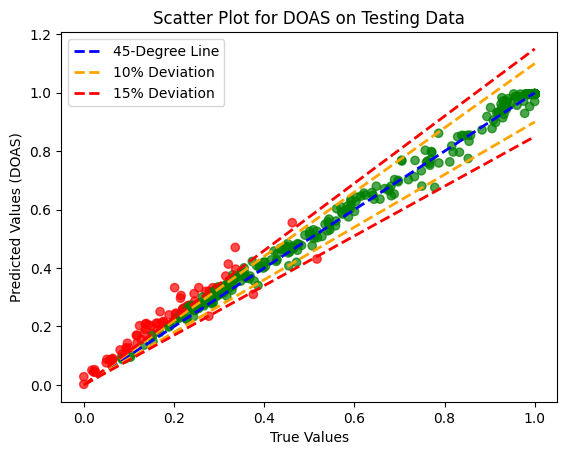

Number of data points within 15% deviation: 420/485
Number of data points within 10% deviation: 397/485


In [ ]:
y_pred_doas = evaluate_model_performance(model_doas, X_train, y_train_DOAS, X_test, y_test_DOAS, scaler_y_DOAS)

plot_training_history(history, 'loss', 'Training and Validation Loss (DOAS)')
plot_training_history(history, 'r2_metric', 'Training and Validation R2 Score (DOAS)')

create_scatter_plot(y_test_DOAS.flatten(), y_pred_doas.flatten(), 'DOAS')

In [ ]:
model_rad = create_custom_model()

# Compile the model
custom_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model_rad.compile(optimizer=custom_optimizer, loss='mse' , metrics=[r2_metric])

# Train the model
history = model_rad.fit(X_train, y_train_Rad, epochs=200, batch_size=42, validation_data=(X_test, y_test_Rad), verbose=1)

Epoch 1/200
47/47 [==============================] - 3s 16ms/step - loss: 0.0483 - r2_metric: 0.0735 - val_loss: 0.0197 - val_r2_metric: 0.5830
Epoch 2/200
47/47 [==============================] - 1s 11ms/step - loss: 0.0181 - r2_metric: 0.6478 - val_loss: 0.0151 - val_r2_metric: 0.6755
Epoch 3/200
47/47 [==============================] - 1s 16ms/step - loss: 0.0122 - r2_metric: 0.7578 - val_loss: 0.0077 - val_r2_metric: 0.8331
Epoch 4/200
47/47 [==============================] - 1s 17ms/step - loss: 0.0096 - r2_metric: 0.8125 - val_loss: 0.0076 - val_r2_metric: 0.8342
Epoch 5/200
47/47 [==============================] - 1s 18ms/step - loss: 0.0090 - r2_metric: 0.8129 - val_loss: 0.0083 - val_r2_metric: 0.8148
Epoch 6/200
47/47 [==============================] - 1s 15ms/step - loss: 0.0093 - r2_metric: 0.8206 - val_loss: 0.0056 - val_r2_metric: 0.8756
Epoch 7/200
47/47 [==============================] - 1s 11ms/step - loss: 0.0085 - r2_metric: 0.8321 - val_loss: 0.0063 - val_r2_metric:

61/61 [==============================] - 0s 3ms/step
For test Data with Output DOAS Cooling Energy
Mean Absolute Percentage Error (MAE): 40.11695210402483
Mean Squared Error (MSE): 0.004276445282375598
R-squared: 0.9108098899032896
For train Data with output DOAS Cooling Energy
Mean Absolute Percentage Error (MAE): 21.41315345290532
Mean Squared Error (MSE): 0.0022651412690744316
R-squared: 0.9567857654362165

For scaled data
R-squared for original value(Scaled): 0.9108098896097725
R-squared for Output Dimension DOAS: 0.9108098899032896
Mean Absolute Percentage Error (MAPE) DOAS: 40.11695210402483


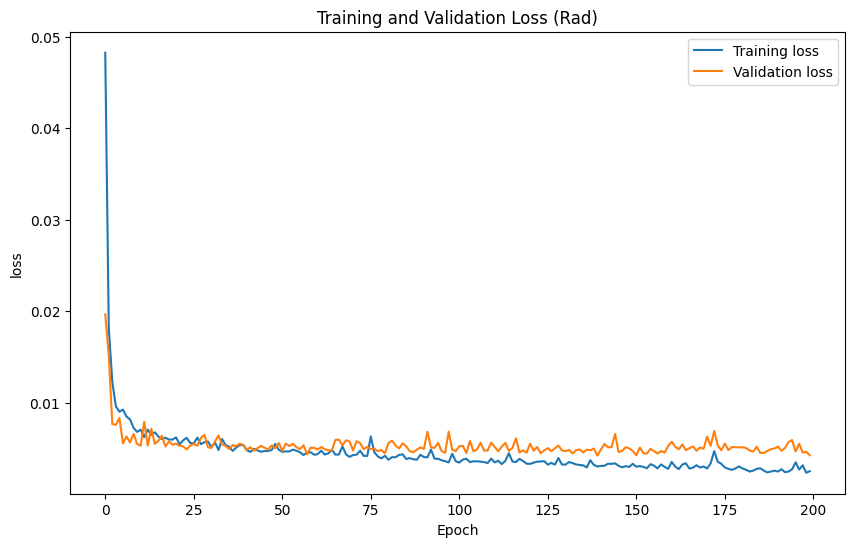

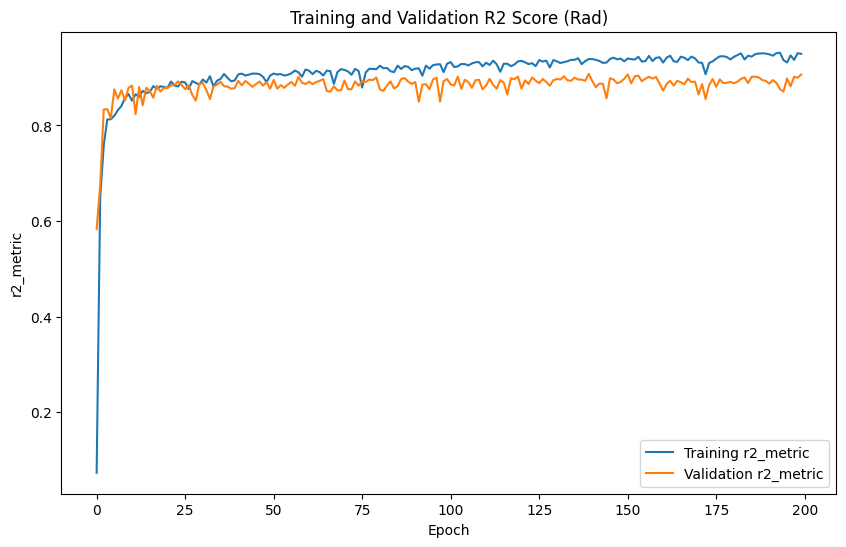

<ipython-input-145-2b3db282833b>:8: RuntimeWarning: divide by zero encountered in divide
  absolute_percentage_error = np.abs((predicted_values - true_values) / true_values) * 100


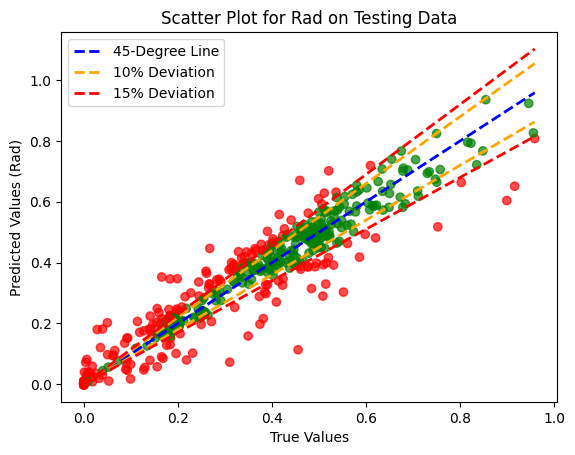

Number of data points within 15% deviation: 263/485
Number of data points within 10% deviation: 199/485


In [ ]:
y_pred_rad = evaluate_model_performance(model_rad, X_train, y_train_Rad, X_test, y_test_Rad, scaler_y_Rad)

plot_training_history(history, 'loss', 'Training and Validation Loss (Rad)')
plot_training_history(history, 'r2_metric', 'Training and Validation R2 Score (Rad)')

create_scatter_plot(y_test_Rad.flatten(), y_pred_rad.flatten(), 'Rad')

In [ ]:
model_solar = create_custom_model()

# Compile the model
custom_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model_solar.compile(optimizer=custom_optimizer, loss='mse' , metrics=[r2_metric])

# Train the model
history = model_solar.fit(X_train, y_train_solar, epochs=200, batch_size=42, validation_data=(X_test, y_test_solar), verbose=1)


Epoch 1/200
47/47 [==============================] - 3s 16ms/step - loss: 0.0640 - r2_metric: -0.1694 - val_loss: 0.0191 - val_r2_metric: 0.6458
Epoch 2/200
47/47 [==============================] - 1s 12ms/step - loss: 0.0161 - r2_metric: 0.6812 - val_loss: 0.0107 - val_r2_metric: 0.7997
Epoch 3/200
47/47 [==============================] - 1s 11ms/step - loss: 0.0094 - r2_metric: 0.8180 - val_loss: 0.0072 - val_r2_metric: 0.8657
Epoch 4/200
47/47 [==============================] - 1s 11ms/step - loss: 0.0079 - r2_metric: 0.8462 - val_loss: 0.0079 - val_r2_metric: 0.8526
Epoch 5/200
47/47 [==============================] - 0s 10ms/step - loss: 0.0056 - r2_metric: 0.8908 - val_loss: 0.0030 - val_r2_metric: 0.9451
Epoch 6/200
47/47 [==============================] - 1s 11ms/step - loss: 0.0050 - r2_metric: 0.9023 - val_loss: 0.0021 - val_r2_metric: 0.9612
Epoch 7/200
47/47 [==============================] - 1s 11ms/step - loss: 0.0040 - r2_metric: 0.9220 - val_loss: 0.0019 - val_r2_metric

61/61 [==============================] - 0s 2ms/step
For test Data with Output DOAS Cooling Energy
Mean Absolute Percentage Error (MAE): 6.112932583583486
Mean Squared Error (MSE): 0.0003638605545742687
R-squared: 0.993336695807739
For train Data with output DOAS Cooling Energy
Mean Absolute Percentage Error (MAE): 6.883047442621234
Mean Squared Error (MSE): 0.00016780661614603038
R-squared: 0.9968854867413466

For scaled data
R-squared for original value(Scaled): 0.9933366959408431
R-squared for Output Dimension DOAS: 0.993336695807739
Mean Absolute Percentage Error (MAPE) DOAS: 6.112932583583486


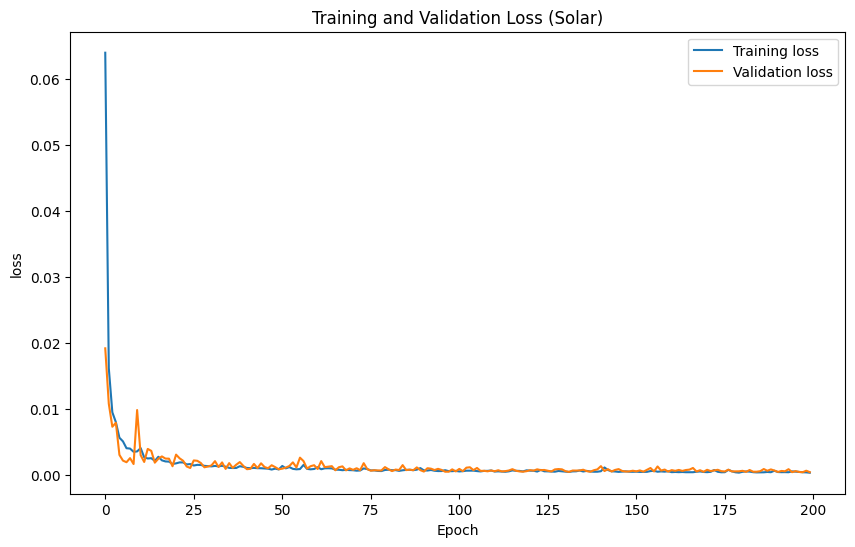

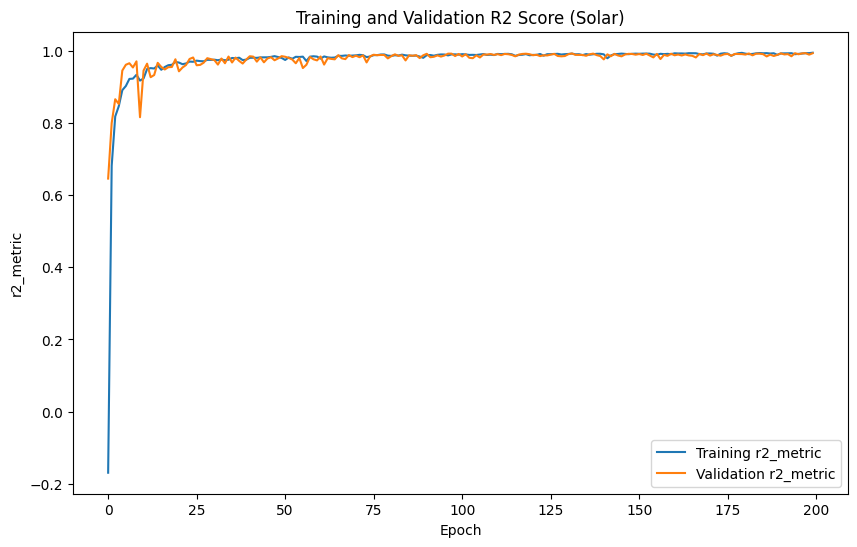

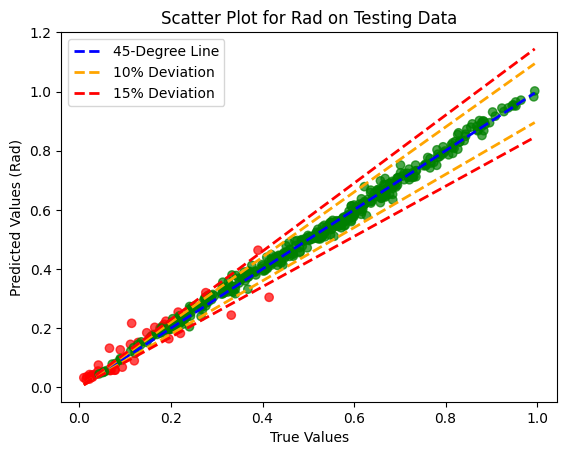

Number of data points within 15% deviation: 450/485
Number of data points within 10% deviation: 431/485


In [ ]:
y_pred_solar= evaluate_model_performance(model_solar, X_train, y_train_solar, X_test, y_test_solar, scaler_y_solar)

plot_training_history(history, 'loss', 'Training and Validation Loss (Solar)')
plot_training_history(history, 'r2_metric', 'Training and Validation R2 Score (Solar)')

create_scatter_plot(y_test_solar.flatten(), y_pred_solar.flatten(), 'Rad')

In [ ]:
model_aux = create_custom_model()

# Compile the model
custom_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model_aux.compile(optimizer=custom_optimizer, loss='mse' , metrics=[r2_metric])

# Train the model
history = model_aux.fit(X_train, y_train_aux, epochs=200, batch_size=42, validation_data=(X_test, y_test_aux), verbose=1)


Epoch 1/200
47/47 [==============================] - 3s 16ms/step - loss: 0.0426 - r2_metric: 0.2328 - val_loss: 0.0148 - val_r2_metric: 0.7491
Epoch 2/200
47/47 [==============================] - 0s 11ms/step - loss: 0.0158 - r2_metric: 0.6993 - val_loss: 0.0111 - val_r2_metric: 0.8129
Epoch 3/200
47/47 [==============================] - 1s 18ms/step - loss: 0.0099 - r2_metric: 0.8124 - val_loss: 0.0048 - val_r2_metric: 0.9175
Epoch 4/200
47/47 [==============================] - 1s 18ms/step - loss: 0.0072 - r2_metric: 0.8625 - val_loss: 0.0062 - val_r2_metric: 0.8953
Epoch 5/200
47/47 [==============================] - 1s 19ms/step - loss: 0.0053 - r2_metric: 0.9003 - val_loss: 0.0032 - val_r2_metric: 0.9464
Epoch 6/200
47/47 [==============================] - 1s 11ms/step - loss: 0.0047 - r2_metric: 0.9119 - val_loss: 0.0077 - val_r2_metric: 0.8687
Epoch 7/200
47/47 [==============================] - 0s 10ms/step - loss: 0.0046 - r2_metric: 0.9153 - val_loss: 0.0058 - val_r2_metric:

61/61 [==============================] - 0s 4ms/step
For test Data with Output DOAS Cooling Energy
Mean Absolute Percentage Error (MAE): 53.43214764452746
Mean Squared Error (MSE): 0.0007791114908526765
R-squared: 0.9868745647314849
For train Data with output DOAS Cooling Energy
Mean Absolute Percentage Error (MAE): 70.96391740431957
Mean Squared Error (MSE): 0.0004007584265782605
R-squared: 0.9928043778659711

For scaled data
R-squared for original value(Scaled): 0.9868745634133451
R-squared for Output Dimension DOAS: 0.9868745647314849
Mean Absolute Percentage Error (MAPE) DOAS: 53.43214764452746


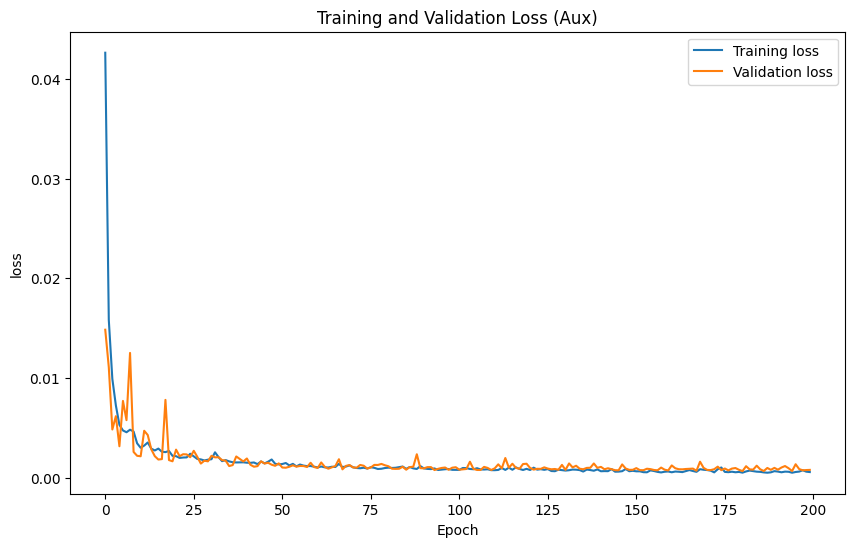

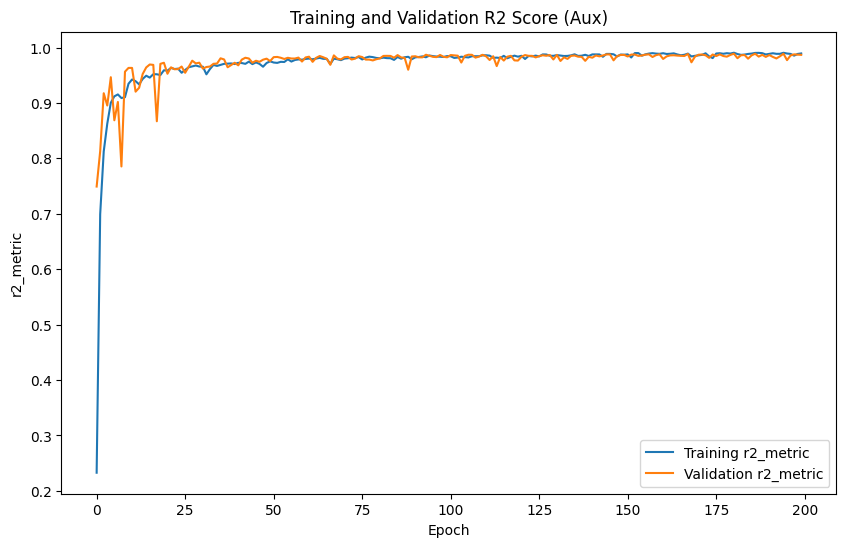

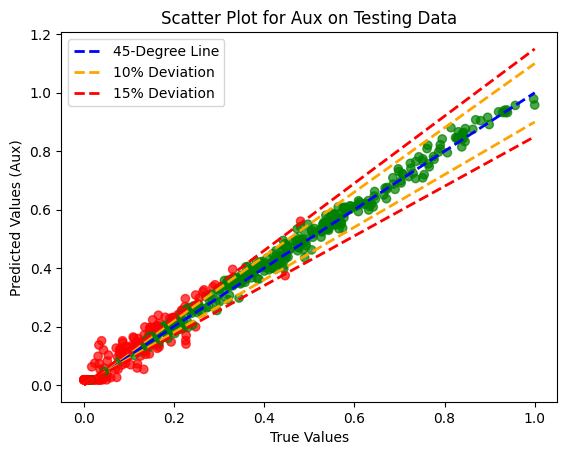

Number of data points within 15% deviation: 353/485
Number of data points within 10% deviation: 307/485


In [ ]:
y_pred_aux= evaluate_model_performance(model_aux, X_train, y_train_aux, X_test, y_test_aux, scaler_y_aux)

plot_training_history(history, 'loss', 'Training and Validation Loss (Aux)')
plot_training_history(history, 'r2_metric', 'Training and Validation R2 Score (Aux)')

create_scatter_plot(y_test_aux.flatten(), y_pred_aux.flatten(), 'Aux')

In [ ]:
model_boil = create_custom_model()

# Compile the model
custom_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model_boil.compile(optimizer=custom_optimizer, loss='mse' , metrics=[r2_metric])

# Train the model
history = model_boil.fit(X_train, y_train_boil, epochs=200, batch_size=42, validation_data=(X_test, y_test_boil), verbose=1)


Epoch 1/200
47/47 [==============================] - 4s 17ms/step - loss: 0.0895 - r2_metric: -27259.9199 - val_loss: 0.0532 - val_r2_metric: 0.3922
Epoch 2/200
47/47 [==============================] - 1s 12ms/step - loss: 0.0486 - r2_metric: 0.4758 - val_loss: 0.0323 - val_r2_metric: 0.6222
Epoch 3/200
47/47 [==============================] - 1s 12ms/step - loss: 0.0312 - r2_metric: 0.6753 - val_loss: 0.0209 - val_r2_metric: 0.7445
Epoch 4/200
47/47 [==============================] - 1s 12ms/step - loss: 0.0244 - r2_metric: 0.1337 - val_loss: 0.0175 - val_r2_metric: 0.7917
Epoch 5/200
47/47 [==============================] - 1s 12ms/step - loss: 0.0205 - r2_metric: 0.7775 - val_loss: 0.0153 - val_r2_metric: 0.8242
Epoch 6/200
47/47 [==============================] - 1s 12ms/step - loss: 0.0206 - r2_metric: 0.7741 - val_loss: 0.0149 - val_r2_metric: 0.8280
Epoch 7/200
47/47 [==============================] - 1s 11ms/step - loss: 0.0169 - r2_metric: 0.8106 - val_loss: 0.0133 - val_r2_me

61/61 [==============================] - 0s 3ms/step
For test Data with Output DOAS Cooling Energy
Mean Absolute Percentage Error (MAE): 22.973810460292903
Mean Squared Error (MSE): 0.0037204049257598282
R-squared: 0.9583281965433313
For train Data with output DOAS Cooling Energy
Mean Absolute Percentage Error (MAE): 12.092299412894507
Mean Squared Error (MSE): 0.0009463420631455402
R-squared: 0.9903425990878598

For scaled data
R-squared for original value(Scaled): 0.9583281976428923
R-squared for Output Dimension DOAS: 0.9583281965433313
Mean Absolute Percentage Error (MAPE) DOAS: 22.973810460292903


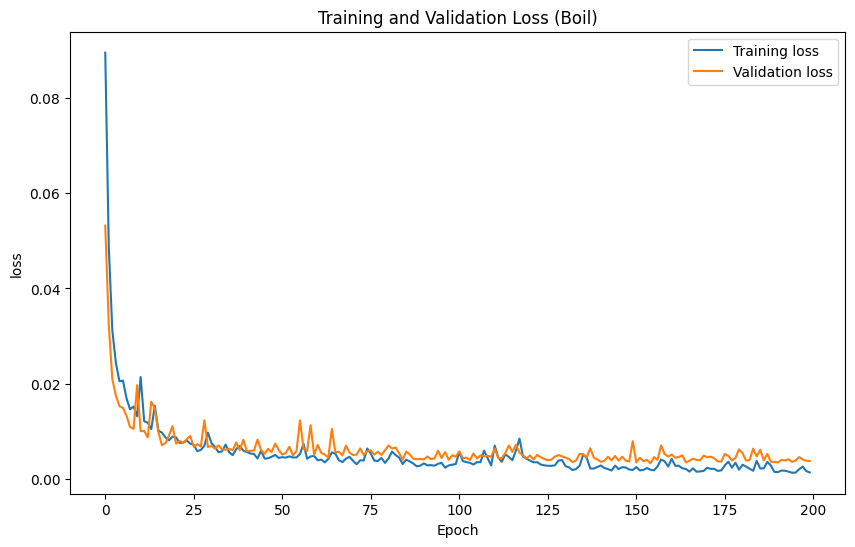

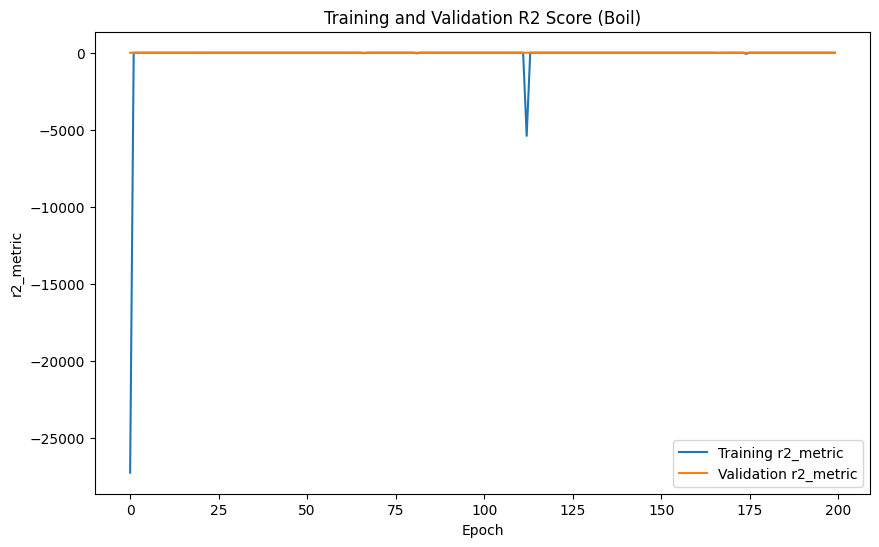

<ipython-input-145-2b3db282833b>:8: RuntimeWarning: divide by zero encountered in divide
  absolute_percentage_error = np.abs((predicted_values - true_values) / true_values) * 100


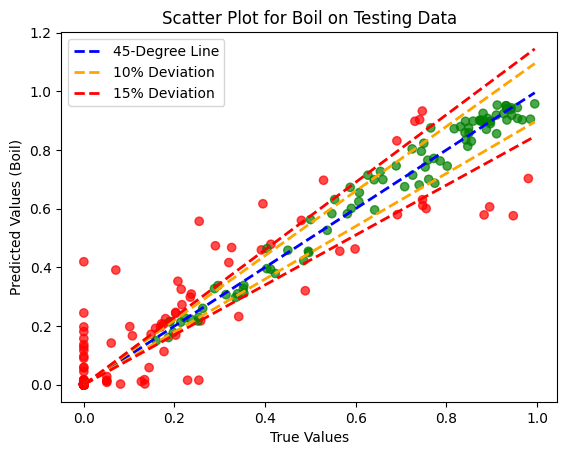

Number of data points within 15% deviation: 92/485
Number of data points within 10% deviation: 73/485


In [ ]:
y_pred_boil= evaluate_model_performance(model_boil, X_train, y_train_boil, X_test, y_test_boil, scaler_y_boil)

plot_training_history(history, 'loss', 'Training and Validation Loss (Boil)')
plot_training_history(history, 'r2_metric', 'Training and Validation R2 Score (Boil)')

create_scatter_plot(y_test_boil.flatten(), y_pred_boil.flatten(), 'Boil')

In [ ]:
# from keras.models import model_from_json

# # Save the model architecture as JSON
# model_json = model.to_json()
# with open("model.json", "w") as json_file:
#     json_file.write(model_json)

# # Save the model weights to HDF5 format
# model.save_weights("model.h5")

# print("Model saved successfully.")

In [ ]:
# y_c_pred = model.predict(X_train)
# y_c_pred = y_c_pred.reshape(-1, 1)
# y_c_pred_test = model.predict(X_test)
# y_c_pred_test = y_c_pred_test.reshape(-1, 1)

# # Concatenate y_c_pred with X_train horizontally
# X_train_combined = np.hstack((X_train, y_c_pred))
# X_test_combined = np.hstack((X_test, y_c_pred_test))